In [43]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import fowlkes_mallows_score

(_, _), (test_data, test_target) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 12s 0us/step


In [44]:
print("The shape of test_data is {}".format(test_data.shape))
print("The shape of test_target is {}".format(test_target.shape))

The shape of test_data is (10000, 32, 32, 3)
The shape of test_target is (10000, 1)


In [49]:
data = test_data.reshape(test_data.shape[0], -1)
target = test_target.flatten()
print("The shape of data is {}".format(data.shape))
print("The shape of target is {}".format(target.shape))

The shape of data is (10000, 3072)
The shape of target is (10000,)


In [46]:
data[0,:]

array([158, 112,  49, ...,  21,  67, 110], dtype=uint8)

In [47]:
test_data[0,:]

array([[[158, 112,  49],
        [159, 111,  47],
        [165, 116,  51],
        ...,
        [137,  95,  36],
        [126,  91,  36],
        [116,  85,  33]],

       [[152, 112,  51],
        [151, 110,  40],
        [159, 114,  45],
        ...,
        [136,  95,  31],
        [125,  91,  32],
        [119,  88,  34]],

       [[151, 110,  47],
        [151, 109,  33],
        [158, 111,  36],
        ...,
        [139,  98,  34],
        [130,  95,  34],
        [120,  89,  33]],

       ...,

       [[ 68, 124, 177],
        [ 42, 100, 148],
        [ 31,  88, 137],
        ...,
        [ 38,  97, 146],
        [ 13,  64, 108],
        [ 40,  85, 127]],

       [[ 61, 116, 168],
        [ 49, 102, 148],
        [ 35,  85, 132],
        ...,
        [ 26,  82, 130],
        [ 29,  82, 126],
        [ 20,  64, 107]],

       [[ 54, 107, 160],
        [ 56, 105, 149],
        [ 45,  89, 132],
        ...,
        [ 24,  77, 124],
        [ 34,  84, 129],
        [ 21,  67, 110]]

In [39]:
np.random.seed(0)

# feature scaling
num_classes = 10

num_features = data.shape[1]
scaler = StandardScaler() 
scaler.fit(data)
X_scaled = scaler.transform(data)

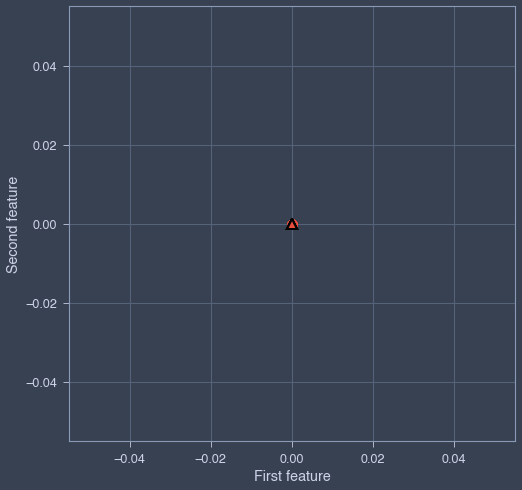

In [40]:
kmeans = KMeans(n_clusters=num_classes, random_state=0) 
kmeans.fit(X_scaled)

Original shape: (10000, 784)
Reduced shape: (10000, 784)


NameError: name 'target_names' is not defined

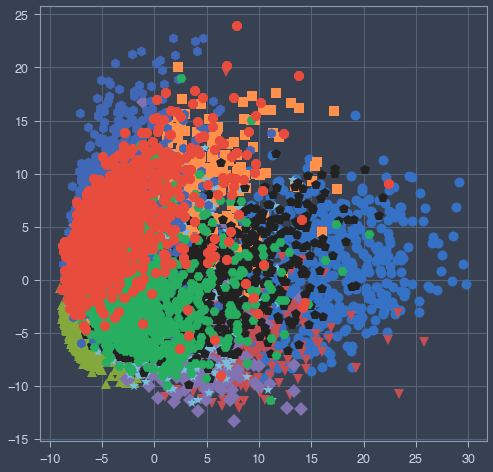

In [41]:
# Apply pca to scaled data

pca = PCA()
pca.fit(X_scaled)
X_scaled_pca = pca.transform(X_scaled)
#print("Explained variance ratio: {}".format(pca.explained_variance_ratio_))



In [42]:
adRand = np.zeros((num_features, 1))
#FM = np.zeros((num_features, 1))
step = 1
for i in np.arange(num_features):
    # build the clustering model for the first i PCs
    if i < 200 and (i+1) % 5 == 0:
        pca_kmeans = KMeans(n_clusters=num_classes, random_state=0) 
        pca_kmeans.fit(X_scaled_pca[:, :i+1])
        adRand[i] = adjusted_rand_score(target, pca_kmeans.labels_)
    #FM[i] = fowlkes_mallows_score(target, pca_kmeans.labels_) 

KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(16, 10))
plt.ylim(0,1)
#plt.xlim(1, num_features)
plt.gca().set_aspect("auto")
plt.xlabel("Number of principal components")
plt.ylabel("Adjusted Rand index")
plt.hlines(adjusted_rand_score(target, kmeans.labels_), 1, 200, color = "y",linestyle='--')
plt.plot(np.arange(1, num_features+1), adRand, linestyle='--', marker='o', linewidth=2)
x_major_locator = plt.MultipleLocator(5)
y_major_locator = plt.MultipleLocator(0.1)
plt.gca().xaxis.set_major_locator(x_major_locator)
plt.gca().yaxis.set_major_locator(y_major_locator)

plt.savefig("adRand_cifar10.png")
np.savetxt('adRand_cifar10.csv', adRand, delimiter=',')